<a href="https://colab.research.google.com/github/Manish-Bilore/ME-781-Statistical-ML-and-Data-Mining/blob/main/ME781_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 03

Python program that takes a 3D point as an input and calculates its Euclidean norm and Mahalanobis norm from the center of the two clusters of data given in the attachment. Visualize the clusters and the input data point in a 3D plot.

In [120]:
# Load the data repo
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
# import lib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random as rd

Define File Path

In [122]:
file_path_cluster01 = '/content/drive/MyDrive/ME781/Assignment 03/3D_cluster1.csv'
file_path_cluster02 = '/content/drive/MyDrive/ME781/Assignment 03/3D_cluster2.csv'

Read the data

In [123]:
# Cluster 01
df_c1 = pd.read_csv(file_path_cluster01)

# Cluster 02
df_c2 = pd.read_csv(file_path_cluster02)

# Find the Center of the two clusters

In [124]:
# Define the function to find the centeroid of the cluster of data

def centeroid(dataframe):
  x_val = float(dataframe['x'].mean())
  y_val = float(dataframe['y'].mean())
  z_val = float(dataframe['z'].mean())

  return (x_val, y_val, z_val)

In [125]:
# Call the function to find the centeroid of the cluster of data

cen_c1 = centeroid(df_c1)
cen_c2 = centeroid(df_c2)

#  3D point

Generate a random 3D point

In [126]:
# Generate random x, y, z coordinates
test_point = np.random.uniform(10, 50, size = 3)

# Euclidean Norm

Euclidean norm of a vector is also known as the L2 norm or the magnitude of the vector. It is calculated as the square root of the sum of the squares of the vector's components

If you have a vector $\textbf{v} = [v_1, v_2, \cdots, v_n]$

then the Euclidean norm is given by:

$\||v||_2 = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2}$

where

*  $v$ : The vector for which norm is being calculated

*  $v_i$ : The $i$-th component for the vector $v$

*  $||v||_2$ : Euclidean or L2 norm of the vector $v$, representing the magnitude of the vecor in ht n-dimensional space

# Euclidean distance

The Euclidean distance between a point $x$ and the center of a cluster $𝜇$ is given by:

$d_E = \sqrt{(x_1 - 𝜇_1)^2 + (x_2 - 𝜇_2)^2 + \cdots + (x_n - 𝜇_n)^2}$

where

* $x$ : point or vector from where the distance is measured
*  𝜇 : reference point or the center of a cluster (mean)
*  $x_i$ : The $i$-th component for the point $x$
*  $𝜇_i$ : The $i$-th component for the point $𝜇$
* $d_E$ : The Euclidean distance between the point 𝑥 and the center of the cluster 𝜇. It represents the straight-line distance between these two points in n-dimensional space


In [127]:
# Euclidean distances

# Cluster 01
euclidean_distance1 = np.linalg.norm(test_point - cen_c1)

# Cluster 02
euclidean_distance2 = np.linalg.norm(test_point - cen_c2)

# Mahalanobis Norm

The Mahalanobis norm is a generalization of the Euclidean norm that takes into account the correlation between variables.

calculate distances between points in a space where the variance differs across dimensions

useful when dealing with multivariate data, where variables are correlated

# Mahalanobis Distance:

$d_M(x) = \sqrt{(x - 𝜇)^T Σ^{-1}(x - 𝜇)}$

where
* $x$ : vector representation of the point
* $μ$ : mean vector of the cluster
* $Σ^{-1}$ : inverse covarianve matrix

# Usage:

Anomaly Detection: used to detect outliers by measuring how far a point is from the mean in terms of standard deviations

Classification: helps classify points by measuring the distance to different class centroids

# Mahalanobis Norm:

When applied as a norm, it involves standardizing the data by the covariance matrix to measure distances more appropriately in the context of multivariate distributions

In practice, the Mahalanobis distance is useful in multivariate dataset and to understand distances or anomalies accounting for the underlying structure of the data

In [128]:
# Covariance matrix

# Cluster 01
cov_mat1 = np.cov(df_c1, rowvar=False)

# Cluster 02
cov_mat2 = np.cov(df_c2, rowvar=False)

In [129]:
# Inverse of covariance matrices

# Cluster 01
inv_cov_mat1 =np.linalg.inv(cov_mat1)

# Cluster 02
inv_cov_mat2 =np.linalg.inv(cov_mat2)

In [130]:
# Mahalanobis distances

# Cluster 01
mahalanobis_dist1 = np.sqrt((test_point - cen_c1).T @ inv_cov_mat1 @ (test_point - cen_c1))

# Cluster 02
mahalanobis_dist2 = np.sqrt((test_point - cen_c2).T @ inv_cov_mat2 @ (test_point - cen_c2))

# Print the results


In [131]:
print("Euclidean Distance from Center 1:", round(euclidean_distance1, 3))
print("Euclidean Distance from Center 2:", round(euclidean_distance2, 3))
print("\n")
print("Mahalanobis Distance from Center 1:", round(mahalanobis_dist1, 3))
print("Mahalanobis Distance from Center 2:", round(mahalanobis_dist2, 3))

Euclidean Distance from Center 1: 46.444
Euclidean Distance from Center 2: 36.314


Mahalanobis Distance from Center 1: 34.445
Mahalanobis Distance from Center 2: 7.486


# Visualise the results

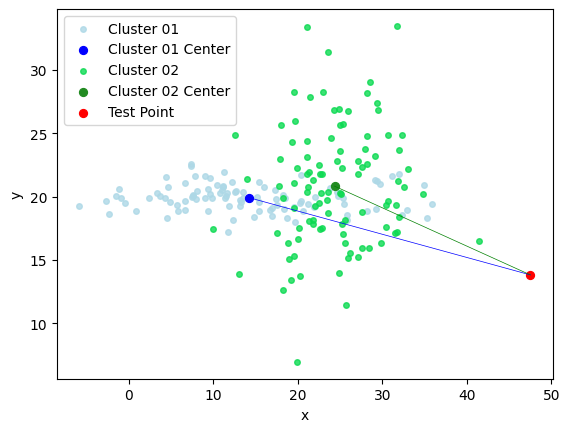

In [132]:
# Cluster 01
ax = df_c1.plot(kind='scatter', x='x', y='y', s=16, alpha=.8, color='#ADD8E6', label='Cluster 01')

# Cluster 01 Center
plt.scatter(cen_c1[0], cen_c1[1], color='blue', s=32, label='Cluster 01 Center')

# Cluster 02
df_c2.plot(kind='scatter', x='x', y='y', s=16, alpha=.8, color='#0BDA51', label='Cluster 02', ax=ax)

# Cluster 02 Center
plt.scatter(cen_c2[0], cen_c2[1], color='#228B22', s=32, label='Cluster 02 Center')

# Test Point
plt.scatter(test_point[0], test_point[1], color='red', s=32, label='Test Point')

# Add line b/n Test Point and Cluster Center
plt.plot([test_point[0], cen_c1[0]], [test_point[1], cen_c1[1]], color='blue', linewidth=0.5)
plt.plot([test_point[0], cen_c2[0]], [test_point[1], cen_c2[1]], color='green', linewidth=0.5)

# Add legend
plt.legend()

# Visualise the results with Projection Lines

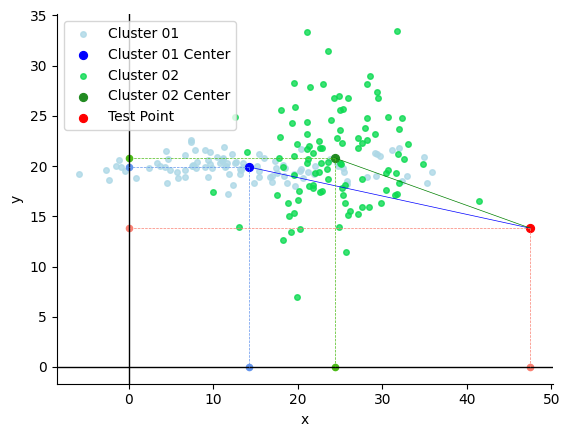

In [133]:


# Cluster 01
ax = df_c1.plot(kind='scatter', x='x', y='y', s=16, alpha=.8, color='#ADD8E6', label='Cluster 01')

# Cluster 01 Center
plt.scatter(cen_c1[0], cen_c1[1], color='blue', s=32, label='Cluster 01 Center')

# Cluster 02
df_c2.plot(kind='scatter', x='x', y='y', s=16, alpha=.8, color='#0BDA51', label='Cluster 02', ax=ax)

# Cluster 02 Center
plt.scatter(cen_c2[0], cen_c2[1], color='#228B22', s=32, label='Cluster 02 Center')

# Draw the x-axis (y=0) and y-axis (x=0) lines
plt.axhline(0, color='black', linewidth=1)  # x-axis
plt.axvline(0, color='black', linewidth=1)  # y-axis

# Test Point
plt.scatter(test_point[0], test_point[1], color='red', s=32, label='Test Point')

# Add line b/n Test Point and Cluster Center
plt.plot([test_point[0], cen_c1[0]], [test_point[1], cen_c1[1]], color='blue', linewidth=0.5)
plt.plot([test_point[0], cen_c2[0]], [test_point[1], cen_c2[1]], color='green', linewidth=0.5)

# Project point
point = cen_c1
projection_x = (point[0], 0)
projection_y = (0, point[1])

# Plot the projections
plt.scatter(projection_x[0], projection_x[1], color='#6495ED', s=20)
plt.scatter(projection_y[0], projection_y[1], color='#6495ED', s=20)

# Plot lines for projections
plt.plot([point[0], projection_x[0]], [point[1], projection_x[1]], color='#6495ED', linestyle='--', linewidth=0.5)
plt.plot([point[0], projection_y[0]], [point[1], projection_y[1]], color='#6495ED', linestyle='--', linewidth=0.5)

# Project point
point = cen_c2
projection_x = (point[0], 0)
projection_y = (0, point[1])

# Plot the projections
plt.scatter(projection_x[0], projection_x[1], color='#4CBB17', s=20)
plt.scatter(projection_y[0], projection_y[1], color='#4CBB17', s=20)

# Plot lines for projections
plt.plot([point[0], projection_x[0]], [point[1], projection_x[1]], color='#4CBB17', linestyle='--', linewidth=0.5)
plt.plot([point[0], projection_y[0]], [point[1], projection_y[1]], color='#4CBB17', linestyle='--', linewidth=0.5)

# Project point
point = test_point
projection_x = (point[0], 0)
projection_y = (0, point[1])

# Plot the projections
plt.scatter(projection_x[0], projection_x[1], color='#FA8072', s=20)
plt.scatter(projection_y[0], projection_y[1], color='#FA8072', s=20)

# Plot lines for projections
plt.plot([point[0], projection_x[0]], [point[1], projection_x[1]], color='#FA8072', linestyle='--', linewidth=0.5)
plt.plot([point[0], projection_y[0]], [point[1], projection_y[1]], color='#FA8072', linestyle='--', linewidth=0.5)




plt.gca().spines[['top', 'right']].set_visible(False)

# Add legend
plt.legend()